In [ ]:
import numpy as np
from tensorflow import keras

import matplotlib.pyplot as plt
import random

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model, layers, Input


# Carga de dados

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

9


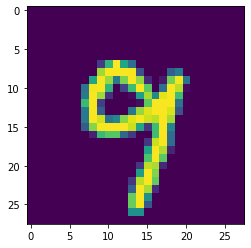

In [ ]:
index = random.randrange(0, len(x_train))  # choose an index ;-)

print(y_train[index])
image = np.asarray(x_train[index]).squeeze()
plt.imshow(image)
plt.show()

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape

(60000, 28, 28)

# CNN modelo API funcional

Parameters

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

## **Feature Extraction**

Defining Input

In [ ]:
# Definir input
in_img = keras.Input(shape=input_shape)

Defining network structure

In [ ]:
# Definir estrutura da rede
x = Conv2D(64, kernel_size=(5, 5), activation="relu")(in_img)
x1 = MaxPooling2D(pool_size=(2, 2))(x)
x2 = Conv2D(64, kernel_size=(3, 3), activation="relu")(x1)
# x21 e x22 vem de x2 -> to ramificando

First Ramification (from x2)

In [ ]:
# Ramificação 1
x2v1 = MaxPooling2D(pool_size=(2, 2))(x2) #x3
x3v1 = Conv2D(64, kernel_size=(3, 3), activation="relu")(x2v1)
x4v1 = MaxPooling2D(pool_size=(2, 2))(x3v1)
# FLATTEN
# Ocorre depois de fazer feature extraction
# Serializa pra poder ir pras densas
x5v1 = Flatten()(x4v1) 

Second Ramification (from x2)

In [ ]:
# Ramificação 2
x2v2 = MaxPooling2D(pool_size=(4, 4))(x2) #x4
x5v2 = Flatten()(x2v2)

Defining output

In [ ]:
# Definir output
concat = layers.concatenate([x5v1, x5v2])

Dense layer

In [ ]:
# Camada densa
dense1 = Dense(256, activation = 'tanh')(concat)

out_digito = Dense(num_classes, activation="softmax", name="out_digito")(dense1)
out_maior_que_5 = Dense(1, activation="sigmoid", name="out_maior_que_5")(dense1)

Using Model Class

In [ ]:
model = Model(
    inputs = in_img,
    outputs = [out_maior_que_5, out_digito]
)

In [ ]:
keras.utils.plot_model(model, "multi_output_model.png", show_shapes=True)

batch_size = 128
epochs = 15

model.compile(loss=["categorical_crossentropy", "binary_crossentropy"], optimizer="adam", metrics=["accuracy"])

In [ ]:
y_maior_que_5 = np.multiply(np.argmax(y_train, axis=1) > 5, 1)

In [ ]:
model.fit(
    x = x_train,
    y = {"out_digito": y_train, "out_maior_que_5": y_maior_que_5},
    epochs = 15,
    batch_size= 32,
    validation_split = 0.15)

Epoch 1/15
1594/1594 [==============================] - 24s 7ms/step - loss: 0.3293 - out_maior_que_5_loss: 0.0000e+00 - out_digito_loss: 0.3293 - out_maior_que_5_accuracy: 0.6006 - out_digito_accuracy: 0.1003 - val_loss: 0.3265 - val_out_maior_que_5_loss: 0.0000e+00 - val_out_digito_loss: 0.3265 - val_out_maior_que_5_accuracy: 0.5987 - val_out_digito_accuracy: 0.1002
Epoch 2/15
1594/1594 [==============================] - 11s 7ms/step - loss: 0.3283 - out_maior_que_5_loss: 0.0000e+00 - out_digito_loss: 0.3283 - out_maior_que_5_accuracy: 0.6006 - out_digito_accuracy: 0.1024 - val_loss: 0.3274 - val_out_maior_que_5_loss: 0.0000e+00 - val_out_digito_loss: 0.3274 - val_out_maior_que_5_accuracy: 0.5987 - val_out_digito_accuracy: 0.1002
Epoch 3/15
1594/1594 [==============================] - 10s 7ms/step - loss: 0.3280 - out_maior_que_5_loss: 0.0000e+00 - out_digito_loss: 0.3280 - out_maior_que_5_accuracy: 0.6006 - out_digito_accuracy: 0.1028 - val_loss: 0.3297 - val_out_maior_que_5_loss: 0